# RK(3,2): Courant Number Optimization on Linearized SWEs

## Linearized SWEs

The linearized SWEs are
\begin{align*}
    \frac{\partial\mathbf{u}}{\partial t} + f\mathbf{u}^\perp &= -g\nabla h \\
    \frac{\partial h}{\partial t} + H (\nabla \cdot \mathbf{u}) &= 0,
\end{align*}
where $\mathbf{u} = (u, v)$ is the horizontal fluid velocity, $t$ is the time coordinate, $f$ is the Coriolis parameter, $g$ is the gravitational constant, $h$ is the fluid thickness, and $H$ is the resting thickness of the fluid. Note that $u^\perp = (-v, u)$.

We can write these in terms of dimensionless quantities by letting $c = \sqrt{gH}$, $\eta = h/H$ and replacing $u$ and $v$ with the dimensionless quantities $\frac{u}{c}$ and $\frac{v}{c}$. Doing this, we get the dimensionless, linear SWEs:
\begin{align*}
    \frac{\partial u}{\partial t} &= fv - c\frac{\partial \eta}{\partial x} \\
    \frac{\partial v}{\partial t} &= -fu - c\frac{\partial \eta}{\partial y} \\
    \frac{\partial \eta}{\partial t} &= -c\left( \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} \right).
\end{align*}
Note that implicit in this simplification is that $H$ is constant, i.e. there is no spatially varying topography.

With the goal of applying a von Neumann-type analysis, we apply a Fourier transform in space. This is equivalent to looking for solutions of the form
\begin{align*}
    u(x, y, t) &= \hat{u}(k, \ell, t)e^{ikx+i\ell y} \\
    v(x, y, t) &= \hat{v}(k, \ell, t)e^{ikx+i\ell y} \\
    \eta(x, y, t) &= \hat{\eta}(k, \ell, t)e^{ikx+i\ell y}.
\end{align*}

In doing this, spatial derivatives are now all of the form
$$ \frac{\partial}{\partial *} \left( e^{ikx+i\ell y} \right). $$
Assuming we are on a rectangular, staggered Arakawa C-grid, discretizing in space yields
\begin{align*}
    \frac{\partial}{\partial x} \left( e^{ikx+i\ell y} \right) &= \frac{i 2 \sin\left(k\frac{\Delta x}{2}\right)}{\Delta x}e^{ikx+i\ell y} \\
    \frac{\partial}{\partial y} \left( e^{ikx+i\ell y} \right) &= \frac{i 2 \sin\left(\ell\frac{\Delta y}{2}\right)}{\Delta y}e^{ikx+i\ell y}.
\end{align*}

To compute the (linear) Coriolis term, we need to be able to compute $u$ at $v$-points and vice-versa. On a rectangular C-grid, we do this with an unweighted 4-point average. For example, to get $v$ at a $u$-point (written as $v_u$), we calculate 
\begin{align*}
    v_u(x, y, t) &= \frac{1}{4}\hat{v}(k, \ell, t)\left( e^{ik\left(x+\frac{\Delta x}{2}\right) + i\ell\left(y+\frac{\Delta y}{2}\right)} + e^{ik\left(x+\frac{\Delta x}{2}\right) + i\ell\left(y-\frac{\Delta y}{2}\right)} + e^{ik\left(x-\frac{\Delta x}{2}\right) + i\ell\left(y+\frac{\Delta y}{2}\right)} + e^{ik\left(x-\frac{\Delta x}{2}\right) + i\ell\left(y-\frac{\Delta y}{2}\right)} \right) \\
    &= \cos\left(k\frac{\Delta x}{2}\right)\cos\left(\ell\frac{\Delta y}{2}\right)\hat{v}(k, \ell, t)e^{ikx+i\ell y}.
\end{align*}
An identical calculation holds for values of $u$ at $v$-points.

Set $K = 2 \sin\left(k\frac{\Delta x}{2}\right)$, $L = 2 \sin\left(\ell\frac{\Delta y}{2}\right)$, and $\tilde{\phi} = f\cos\left(k\frac{\Delta x}{2}\right)\cos\left(\ell\frac{\Delta y}{2}\right)$. Then, the Fourier transformed, spatially discretized (C-grid), linear SWEs, become
\begin{align*}
    \frac{\partial \hat{u}}{\partial t} &= \tilde{\phi}\hat{v} - i \frac{cK}{\Delta x}\hat{\eta} \\
    \frac{\partial \hat{v}}{\partial t} &= -\tilde{\phi}\hat{u} - i \frac{cL}{\Delta y}\hat{\eta} \\
    \frac{\partial \hat{\eta}}{\partial t} &= -i \left( \frac{cK}{\Delta x}\hat{u} + \frac{cL}{\Delta y}\hat{v} \right).
\end{align*}

## Application of RK(3,2)

Now, we can apply a temporal discretization. To ease notation, write $u = \hat{u}$, $v = \hat{v}$, and $\eta = \hat{\eta}$ from now on. RK(3,2) is given by: 
\begin{align*}
    \bar{\eta}^{n+1/3} &= \eta^n - i \frac{\Delta t}{3} \left( \frac{cK}{\Delta x}u^n + \frac{cL}{\Delta y}v^n \right) \\
    \bar{u}^{n+1/3} &= u^n + \frac{\Delta t}{3} \left( \tilde{\phi}v^n - i\frac{cK}{\Delta x}\eta^n \right) \\
    \bar{v}^{n+1/3} &= v^n + \frac{\Delta t}{3} \left( -\tilde{\phi}u^n - i\frac{cL}{\Delta y}\eta^n \right) \\
    & \\
    \bar{\eta}^{n+1/2} &= \eta^n - i \frac{\Delta t}{2} \left( \frac{cK}{\Delta x}\bar{u}^{n+1/3} + \frac{cL}{\Delta y}\bar{v}^{n+1/3} \right) \\
    \bar{u}^{n+1/2} &= u^n + \frac{\Delta t}{2} \left( \tilde{\phi}\bar{v}^{n+1/3} - i\frac{cK}{\Delta x}\bar{\eta}^{n+1/3} \right) \\
    \bar{v}^{n+1/2} &= v^n + \frac{\Delta t}{2} \left( -\tilde{\phi}\bar{u}^{n+1/3} - i\frac{cL}{\Delta y}\bar{\eta}^{n+1/3} \right) \\
    & \\
    \eta^{n+1} &= \eta^n - i \Delta t \left( \frac{cK}{\Delta x}\bar{u}^{n+1/2} + \frac{cL}{\Delta y}\bar{v}^{n+1/2} \right) \\
    u^{n+1} &= u^n + \Delta t \left( \tilde{\phi}\bar{v}^{n+1/2} - i\frac{cK}{\Delta x}\bar{\eta}^{n+1/2} \right) \\
    v^{n+1} &= v^n + \Delta t \left( -\tilde{\phi}\bar{u}^{n+1/2} - i\frac{cL}{\Delta y}\bar{\eta}^{n+1/2} \right).
\end{align*}

Our goal here is to maximize the Courant numbers $\nu_x = c\frac{\Delta t}{\Delta x}$ and $\nu_y = c\frac{\Delta t}{\Delta y}$. So that we can bake these into our notation, we take $\phi = \Delta t \tilde{\phi} = \Delta t f \cos\left(k\frac{\Delta x}{2}\right)\cos\left(\ell\frac{\Delta y}{2}\right)$ rewrite the above as
\begin{align*}
    \bar{\eta}^{n+1/3} &= \eta^n - \frac{1}{3} \left( iK \nu_x u^n + iL \nu_y v^n \right) \\
    \bar{u}^{n+1/3} &= u^n + \frac{1}{3} \left( \phi v^n - iK\nu_x\eta^n \right) \\
    \bar{v}^{n+1/3} &= v^n + \frac{1}{3} \left( -\phi u^n - iL\nu_y\eta^n \right) \\
    & \\
    \bar{\eta}^{n+1/2} &= \eta^n - \frac{1}{2} \left( iK\nu_x  \bar{u}^{n+1/3} + iL\nu_y \bar{v}^{n+1/3} \right) \\
    \bar{u}^{n+1/2} &= u^n + \frac{1}{2} \left( \phi\bar{v}^{n+1/3} - iK\nu_x\bar{\eta}^{n+1/3} \right) \\
    \bar{v}^{n+1/2} &= v^n + \frac{1}{2} \left( -\phi\bar{u}^{n+1/3} - iL\nu_y\bar{\eta}^{n+1/3} \right) \\
    & \\
    \eta^{n+1} &= \eta^n - \left( iK\nu_x \bar{u}^{n+1/2} + iL\nu_y \bar{v}^{n+1/2} \right) \\
    u^{n+1} &= u^n + \left( \phi\bar{v}^{n+1/2} - iK\nu_x\bar{\eta}^{n+1/2} \right) \\
    v^{n+1} &= v^n + \left( -\phi\bar{u}^{n+1/2} - iL\nu_y\bar{\eta}^{n+1/2} \right).
\end{align*}

Note: To revert the above to a point where there was no spatial discretization (i.e. continuous in space), we can simply take $K = k \Delta x$, $L = \ell \Delta y$, and $\phi = \Delta t f$.

In [1]:
from sympy import *
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# define relevent symbols 
#     _u = u^n, _v = v^n, _eta = \eta^n
#     U1 = \bar{u}^{n+1/3}, V1 = \bar{v}^{n+1/3}, ETA1= \bar{\eta}^{n+1/3}
#     U2 = \bar{u}^{n+1/2}, V2 = \bar{v}^{n+1/2}, ETA2= \bar{\eta}^{n+1/2}
#     u = u^{n+1}, v = v^{n+1}, eta = \eta^{n+1}
_u, _v, _eta = symbols('u^n v^n eta^n')
lam, beta1, beta2, beta3 = symbols('lambda beta_1 beta_2 beta_3')
nux, nuy, K, L, phi = symbols('nu_x nu_y K L phi')


# RK(3,2)-FB 
ETA1 = _eta - (1/3) * ( I*K*nux*_u + I*L*nuy*_v )
U1 = _u + (1/3) * ( phi*_v - I*nux*K*( _eta ) )
V1 = _v + (1/3) * ( -phi*_u - I*nuy*L*( _eta ) )

ETA2 = _eta - (1/2) * ( I*K*nux*U1 + I*L*nuy*V1 )
U2 = _u + (1/2) * ( phi*V1 - I*K*nux*( ETA1 ) )
V2 = _v + (1/2) * ( -phi*U1 - I*L*nuy*( ETA1 ) )

eta = _eta - ( I*K*nux*U2 + I*L*nuy*V2 )
u = _u + ( phi*V2 - I*K*nux*( ETA2 ) )
v = _v + ( -phi*U2 - I*L*nuy*(ETA2 ) )

## Amplification matrices

Now, we have a system of linear equations in $\eta^n$, $u^n$, and $v^n$. We can find the amplification matrix for the scheme by writing it in the form
$$ \mathbf{w}^{n+1} = G \mathbf{w}^n, $$
where $G$ is the amplification matrix and $\mathbf{w}^n = (u^n, v^n, \eta^n)^T$.

We care about the amplification matrix $G$ as it follows from the above that $\mathbf{w}^n = G^n \mathbf{w}^0$. In turn, it follows that the solution $\mathbf{w}^n$ is bounded as $n \to \infty$ if and only if $||G^n||$ is bounded as $n \to \infty$.

In [2]:
# create the amplification matrix G
_w = [_u, _v, _eta]
w = [u, v, eta]
_G, _ = linear_eq_to_matrix(w, _w)

x = [nux, nuy, K , L, phi]
_calcG = lambdify(x, _G)

Normally, we would now be interested in the eigenvalues of $G$ given that it can be shown that as long as $G$ is diagonalizable, then $||G^n||$ is bounded if and only if each eigenvalue $\lambda$ of $G$ is such that $|\lambda| \leq 1$. However, we are first interested in choosing the "optimal" FB feedback coefficients $\beta_i$.

To do this, we first need to know the eigenvalues of the amplification matrix in the continuous problem. The continuous problem can be written as
$$ \frac{\partial}{\partial t} \begin{pmatrix}
    u \\ v \\ \eta
\end{pmatrix} = \begin{pmatrix}
    0 & f & -ick \\ -f & 0 & -ic\ell \\ -ick & -ic\ell & 0
\end{pmatrix} \begin{pmatrix}
    u \\ v \\ \eta
\end{pmatrix}. $$

It can be shown that the general solution to the system is
$$ \begin{pmatrix}
    u(t) \\ v(t) \\ \eta(t)
\end{pmatrix} = e^{ At }\begin{pmatrix}
    u(0) \\ v(0) \\ \eta(0)
\end{pmatrix}, $$
where
$$ A = \begin{pmatrix}
    0 & f & -ick \\ -f & 0 & -ic\ell \\ -ick & -ic\ell & 0
\end{pmatrix}. $$

Now, consider the general solution of the system after exactly one time-step, i.e. at  time $t = \Delta t$. Then,
\begin{align*}
    A \Delta t &= \begin{pmatrix}
        0 & f \Delta t & -ic\Delta t k \\ 
        -f \Delta t & 0 & -ic\Delta t \ell \\ 
        -ic\Delta t k & -ic\Delta t\ell & 0
    \end{pmatrix} \\
    &= \begin{pmatrix}
        0 & f \Delta t & -i\tilde{K}\nu_x \\ 
        -f \Delta t & 0 & -i\tilde{L}\nu_y \\ 
        -i\tilde{K}\nu_x & -i\tilde{L}\nu_y & 0
    \end{pmatrix}.
\end{align*}
where $\tilde{K} = k \Delta x$ and $\tilde{L} = \ell \Delta y$. The final step in the above is done so that we can have the Courant numbers $\nu_x$ and $\nu_y$ baked directly into the notation.

Let $\tilde{G} = e^{A\Delta t}$. This is the exact amplification matrix we wish to "approximate" by our numerical amplification matrix $G$.

In [3]:
# We build Gtilde using scipy, not sympy -- the symbolic calculation
# of e^{A\Delta t} takes too long (~4 hours). The symbolic expression 
# is too complicated to be meaningful to a human anyway.
def _calcGtilde(nux, nuy, Ktilde, Ltilde, fdt):
    Adt = np.matrix( [[0, fdt, -1j*Ktilde*nux],
                      [-fdt, 0, -1j*Ltilde*nuy],
                      [-1j*Ktilde*nux, -1j*Ltilde*nuy, 0]] )
    return sp.linalg.expm(Adt)
# END calcGtilde()

## Statement of the optimization problem

Now we can clearly state our goal: Choose the FBFCs $\beta_i$ so that the eigenvalues of the numerical amplification matrix $G$ approximate the eigenvalues of $\tilde{G} = e^{A\Delta t}$ while maximizing the Courant numbers $\nu_x$ and $\nu_y$. To do this, we are going to solve a numerical optimization problem.

Let $\nu_x^\text{max}$ and $\nu_y^\text{max}$ be the maximum allowable Courant numbers for stability of the method. These depend on our choice of the FBFCs $\beta_i$. We can maximize
$\nu_*^\text{max}$ by minimizing an appropriate cost function
$$ C = C(\nu_x^\text{max}, \nu_y^\text{max}, \beta_1, \beta_2, \beta_3), $$
subject to the restriction that eigenvalues of $G$, $\lambda = \lambda(\nu_x, \nu_y, \beta_1, \beta_2, \beta_3)$, are such that
$$ |\lambda(\nu_x, \nu_y, \beta_1, \beta_2, \beta_3)| \leq 1 \qquad \forall\ (\nu_x, \nu_y) \in (0, \nu_x^\text{max}] \times (0, \nu_y^\text{max}]. $$

### Simplifying assumptions

Before we can move forward, we need to address the additional parameters that both $\tilde{G}$ and $G$ depend on. These are:
\begin{align*}
    \tilde{K} &= k\Delta x \\
    \tilde{L} &= \ell\Delta y \\
    & \\
    K &= 2\sin\left(k\frac{\Delta x}{2}\right) \\
    L &= 2\sin\left(\ell\frac{\Delta y}{2}\right) \\
    & \\
    \phi &= f\Delta t \cos\left(k\frac{\Delta x}{2}\right)\cos\left(\ell\frac{\Delta y}{2}\right)
\end{align*}
We need to fix these values so that they are not counted as free parameters in the optimization problem. As can be seen in the cell below, we only need to fix values for $\tilde{K}$ and $f\Delta t$, then values for the other parameters follow.

According to Bob, a decent choice for $f$ would be $f = 10^{-4}$, and since the time-steps for the nonlinear SWE test cases we are looking at are on the order of $10^2$, a good choice for $f\Delta t$ is
$$f\Delta t = 10^{-2}.$$

For $\tilde{K}$ and $\tilde{L}$, we want to sample this space:
$$\left(\tilde{K}, \tilde{L} \right) \in [0, \pi] \times [0, \pi].$$
For each pair $\left(\tilde{K}, \tilde{L} \right)$, we need to complete the optimization problem and get a suggested tuple of $\beta_i$.

In [4]:
# Define a function to sort eigenvalues so we know which to compare
def parseEigVals(eigVals):
    eigValDict = {}
    reals = []
    for eigVal in eigVals:
        if np.isclose(eigVal, 1.0+0.0j):
            eigValDict['one'] = eigVal
        elif not np.isclose(eigVal.imag, 0.0):
            if eigVal.imag > 0:
                eigValDict['pos'] = eigVal
            else:
                eigValDict['neg'] = eigVal
        else:
            reals.append(eigVal.real)
            eigValDict['real'] = reals
        # END if
    # END for
    return eigValDict
#END parseEigVals()


# Define a function to create a plot comparing exact/numerical eigenvalues
def eigValPlot(Gtilde, G, KtildeVal=-1, LtildeVal=-1,
               a=-16, b=16, delta=1e-2, nuDotLimit=np.pi/3):
    
    red = '#ee4035'
    orange = '#f37736'
    yellow = '#fdf498'
    green = '#7bc043'
    blue = '#0392cf'
    
    fig, ax = plt.subplots(1)

    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')

    axLim = 1.5
    ax.set_xlim(-axLim, axLim)
    ax.set_ylim(-axLim, axLim)
    ax.set_aspect(1)

    unitCircle = plt.Circle((0, 0), 1, fill=False, color=orange)
    ax.add_artist(unitCircle)

    approx_real = []
    approx_imag = []
    badNus =[]
    count = 0

    for k in np.arange(a, b, delta):
        nu = k*np.pi/16
        # get complex values for exact and approx eigen values
        GtildeEigVals = parseEigVals( sp.linalg.eigvals( Gtilde(nu) ) )
        GEigVals = parseEigVals( sp.linalg.eigvals( G(nu) ) )

        # this process needs to be revisited
        if np.isclose(nu, 0):
            exact = 1+0.j
            approx = 1.+0.j
        else:
            key = 'pos' if nu > 0 else 'neg'
            exact = GtildeEigVals[key]
            if 'real' not in GEigVals.keys():
                approx = GEigVals[key]
            else:
                if len(GEigVals['real']) == 1:
                    approx = GEigVals['real'][0]
                else:
                    ind = 1 if nu >= 0 else 0
                    approx = GEigVals['real'][ind]
                # END if
            # END if
        # END if
        approx_real.append( approx.real )
        approx_imag.append( approx.imag )
        
        absValApprox = sqrt(approx.real**2 + approx.imag**2)
        if absValApprox > 1: badNus.append(nu) 
        
        if ( np.isclose(k%1, 0) or np.isclose(k%1, 1) ) and np.abs(nu) <= nuDotLimit:
            # plot exact and approx eigen values
            colo = blue if absValApprox <= 1 else red
            ax.scatter(exact.real, exact.imag, marker='o', color=orange)
            ax.scatter(approx.real, approx.imag, marker='*', color=colo)
            # connect exact to approx with dashed line
            reals = [approx.real, exact.real]
            imags = [approx.imag, exact.imag]
            ax.plot(reals, imags, color='black', linestyle='dashed', linewidth=0.75, alpha=0.5)
        # END if
    # END for

    ax.plot(approx_real, approx_imag, color=blue)
    try:
        print( 'nu^max ~ {}'.format( np.min(np.abs(badNus)) ) )
    except: pass

# END eigValPlot()

nu^max ~ 0.6126105674499296


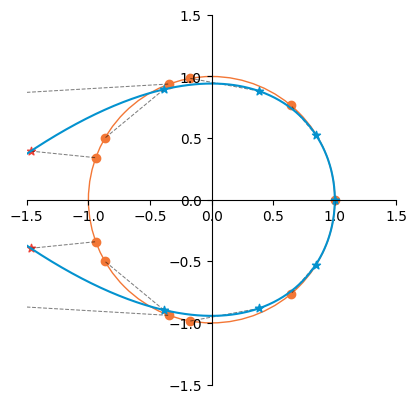

In [5]:
fdtVal = 1e-2

KtildeVal = np.pi
LtildeVal = np.pi

KVal = 2*np.sin(KtildeVal/2)
LVal = 2*np.sin(LtildeVal/2)
phiVal = fdtVal*np.cos(KtildeVal/2)*np.cos(LtildeVal/2)

G = lambda nu: _calcG(nu, nu, KVal, LVal, phiVal)
Gtilde = lambda nu: _calcGtilde(nu, nu, KtildeVal, LtildeVal, fdtVal)

eigValPlot(Gtilde, G)